* **Goal**: TTo perform comprehensive exploratory data analysis (EDA) on E-Commerce transactions to identify key revenue drivers, customer preferences, operational bottlenecks, and actionable business insights
* **Skill**: EDA

### EDA
* EDA is the process of data understanding on Validated data

* In statistics, Exploratory Data Analysis (EDA) is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

* EDA will follow two concepts

    * Stats
      * Descriptive
    * Visual Analysis

### TOC <a id='menu'>

* [0. Data Cleaning](#dc)
* [1. Data Validation and Normalization](#dv)
* [2. EDA](#eda)
    * [2.1 Types of Variables/Columns](#vartype)
    * [2.2 Analysis](#ans)
        * [2.2.1 Uni-Variate Analysis](#uni)
        * [2.2.2 Bi-Variate Analysis](#bi)
        * [2.2.3 Multi-Variate Analysis](#mul)
    * [Insights](#insights)

## 1. Data Cleaning
- Check duplicates
- Handle missing values
- Convert data types
- Basic transformations

In [1]:
# Base libraries
import pandas as pd
import numpy as np

# To supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Loading
df = pd.read_csv("C:\\Users\\palav\\ecommerce_sales_dataset.csv")
df

Order_ID  Order_Date   Ship_Date Customer_ID Customer_Name       City  \
0    ORD1000  2023-01-01  2023-01-04     CUST500        Fatima    Chennai   
1    ORD1001  2023-01-02  2023-01-06     CUST501          Hari      Delhi   
2    ORD1002  2023-01-03  2023-01-04     CUST502        Fatima  Hyderabad   
3    ORD1003  2023-01-04  2023-01-07     CUST503          Arif    Chennai   
4    ORD1004  2023-01-05  2023-01-08     CUST504          John       Pune   
..       ...         ...         ...         ...           ...        ...   
195  ORD1195  2023-07-15  2023-07-17     CUST695          John    Chennai   
196  ORD1196  2023-07-16  2023-07-18     CUST696          Hari  Bangalore   
197  ORD1197  2023-07-17  2023-07-21     CUST697          Ravi  Hyderabad   
198  ORD1198  2023-07-18  2023-07-19     CUST698          Hari       Pune   
199  ORD1199  2023-07-19  2023-07-22     CUST699          Arif       Pune   

           State     Product     Category  Unit_Price  Quantity   Sales  \
0    Maharashtra      Camera  Electronics       18771         1   18771   
1     Tamil Nadu      Laptop  Electronics       36534         4  146136   
2      Karnataka       Shoes      Fashion       33934         3  101802   
3     Tamil Nadu      Laptop  Electronics        4688         1    4688   
4    Maharashtra      Laptop  Electronics       10661         1   10661   
..           ...         ...          ...         ...       ...     ...   
195    Telangana      Camera  Electronics        8662         3   25986   
196    Telangana       Shoes      Fashion        5915         4   23660   
197        Delhi       Shoes      Fashion       36659         1   36659   
198    Karnataka      Laptop  Electronics       44425         2   88850   
199   Tamil Nadu  Headphones  Accessories        6451         3   19353   

     Discount(%)    Profit Payment_Method    Courier Order_Status  
0              5   3800.97     Debit Card  Delhivery    Delivered  
1              5  36291.03     Debit Card  Delhivery     Returned  
2             10  24408.98    Credit Card  Delhivery     Returned  
3              5    846.23    Net Banking  Delhivery     Returned  
4             10   1530.97     Debit Card   BlueDart     Returned  
..           ...       ...            ...        ...          ...  
195           15   2829.23    Credit Card   BlueDart    Delivered  
196           15   6398.58    Credit Card      Ekart    Delivered  
197            0   3925.61    Net Banking  Delhivery    Cancelled  
198            5  14732.24            UPI  Delhivery    Delivered  
199           10   5541.11    Credit Card      Ekart     Returned  

[200 rows x 17 columns]

                                                             Basic Checks

In [3]:
df.head()

Order_ID  Order_Date   Ship_Date Customer_ID Customer_Name       City  \
0  ORD1000  2023-01-01  2023-01-04     CUST500        Fatima    Chennai   
1  ORD1001  2023-01-02  2023-01-06     CUST501          Hari      Delhi   
2  ORD1002  2023-01-03  2023-01-04     CUST502        Fatima  Hyderabad   
3  ORD1003  2023-01-04  2023-01-07     CUST503          Arif    Chennai   
4  ORD1004  2023-01-05  2023-01-08     CUST504          John       Pune   

         State Product     Category  Unit_Price  Quantity   Sales  \
0  Maharashtra  Camera  Electronics       18771         1   18771   
1   Tamil Nadu  Laptop  Electronics       36534         4  146136   
2    Karnataka   Shoes      Fashion       33934         3  101802   
3   Tamil Nadu  Laptop  Electronics        4688         1    4688   
4  Maharashtra  Laptop  Electronics       10661         1   10661   

   Discount(%)    Profit Payment_Method    Courier Order_Status  
0            5   3800.97     Debit Card  Delhivery    Delivered  
1            5  36291.03     Debit Card  Delhivery     Returned  
2           10  24408.98    Credit Card  Delhivery     Returned  
3            5    846.23    Net Banking  Delhivery     Returned  
4           10   1530.97     Debit Card   BlueDart     Returned

In [4]:
df.shape

(200, 17)

In [5]:
df.columns

Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Customer_ID', 'Customer_Name',
       'City', 'State', 'Product', 'Category', 'Unit_Price', 'Quantity',
       'Sales', 'Discount(%)', 'Profit', 'Payment_Method', 'Courier',
       'Order_Status'],
      dtype='object')

In [6]:
df.isnull().sum()

Order_ID          0
Order_Date        0
Ship_Date         0
Customer_ID       0
Customer_Name     0
City              0
State             0
Product           0
Category          0
Unit_Price        0
Quantity          0
Sales             0
Discount(%)       0
Profit            0
Payment_Method    0
Courier           0
Order_Status      0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        200 non-null    object 
 1   Order_Date      200 non-null    object 
 2   Ship_Date       200 non-null    object 
 3   Customer_ID     200 non-null    object 
 4   Customer_Name   200 non-null    object 
 5   City            200 non-null    object 
 6   State           200 non-null    object 
 7   Product         200 non-null    object 
 8   Category        200 non-null    object 
 9   Unit_Price      200 non-null    int64  
 10  Quantity        200 non-null    int64  
 11  Sales           200 non-null    int64  
 12  Discount(%)     200 non-null    int64  
 13  Profit          200 non-null    float64
 14  Payment_Method  200 non-null    object 
 15  Courier         200 non-null    object 
 16  Order_Status    200 non-null    object 
dtypes: float64(1), int64(4), object(12)

In [9]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])

In [10]:
df.head()

Order_ID Order_Date  Ship_Date Customer_ID Customer_Name       City  \
0  ORD1000 2023-01-01 2023-01-04     CUST500        Fatima    Chennai   
1  ORD1001 2023-01-02 2023-01-06     CUST501          Hari      Delhi   
2  ORD1002 2023-01-03 2023-01-04     CUST502        Fatima  Hyderabad   
3  ORD1003 2023-01-04 2023-01-07     CUST503          Arif    Chennai   
4  ORD1004 2023-01-05 2023-01-08     CUST504          John       Pune   

         State Product     Category  Unit_Price  Quantity   Sales  \
0  Maharashtra  Camera  Electronics       18771         1   18771   
1   Tamil Nadu  Laptop  Electronics       36534         4  146136   
2    Karnataka   Shoes      Fashion       33934         3  101802   
3   Tamil Nadu  Laptop  Electronics        4688         1    4688   
4  Maharashtra  Laptop  Electronics       10661         1   10661   

   Discount(%)    Profit Payment_Method    Courier Order_Status  
0            5   3800.97     Debit Card  Delhivery    Delivered  
1            5  36291.03     Debit Card  Delhivery     Returned  
2           10  24408.98    Credit Card  Delhivery     Returned  
3            5    846.23    Net Banking  Delhivery     Returned  
4           10   1530.97     Debit Card   BlueDart     Returned

In [11]:
df.describe()

Order_Date            Ship_Date    Unit_Price    Quantity  \
count                  200                  200    200.000000  200.000000   
mean   2023-04-10 12:00:00  2023-04-13 01:55:12  23749.320000    2.435000   
min    2023-01-01 00:00:00  2023-01-04 00:00:00    509.000000    1.000000   
25%    2023-02-19 18:00:00  2023-02-22 12:00:00  10742.000000    1.000000   
50%    2023-04-10 12:00:00  2023-04-13 00:00:00  22582.000000    2.000000   
75%    2023-05-30 06:00:00  2023-06-03 00:00:00  38186.250000    3.000000   
max    2023-07-19 00:00:00  2023-07-22 00:00:00  49876.000000    4.000000   
std                    NaN                  NaN  14995.118783    1.114444   

               Sales  Discount(%)        Profit  
count     200.000000   200.000000    200.000000  
mean    57457.810000     7.750000  11297.954100  
min       617.000000     0.000000     72.630000  
25%     19625.250000     5.000000   3894.450000  
50%     43449.500000    10.000000   8731.365000  
75%     84550.500000    10.000000  14805.272500  
max    188740.000000    15.000000  48464.030000  
std     46838.566256     5.462297  10029.836943

                                                        Column Wise Details

| **Column**         | **What It Means**                                        | **How It Helps in Analysis**                                                            |
| ------------------ | -------------------------------------------------------- | --------------------------------------------------------------------------------------- |
| **Order_ID**       | Unique identifier assigned to each order.                | Helps track individual transactions and enables order-level analysis.                   |
| **Order_Date**     | Date on which the order was placed.                      | Useful for analyzing seasonality, demand trends, and sales growth patterns.             |
| **Ship_Date**      | Date on which the order was shipped.                     | Helps calculate shipping delays and evaluate logistics efficiency.                      |
| **Customer_ID**    | Unique identifier for each customer.                     | Supports customer-level segmentation and behavior pattern analysis.                     |
| **Customer_Name**  | Name of the customer placing the order.                  | Useful for customer profiling; generally anonymized during modeling.                    |
| **City**           | City where the customer resides.                         | Enables city-level demand insights and regional sales strategy planning.                |
| **State**          | State where the customer lives.                          | Supports larger geographic segmentation and policy-level analysis.                      |
| **Product**        | Name of the product purchased.                           | Helps identify top-selling products and perform product-level analysis.                 |
| **Category**       | Product category (e.g., Electronics, Fashion).           | Useful for category-wise sales, profit, and demand forecasting.                         |
| **Unit_Price**     | Price per single unit of the product.                    | Helps understand pricing strategy and compute profitability.                            |
| **Quantity**       | Number of units purchased in the order.                  | Important for calculating revenue, demand forecasting, and inventory planning.          |
| **Sales**          | Total sales amount = Unit Price × Quantity.              | Core metric for revenue analysis and business performance evaluation.                   |
| **Discount(%)**    | Percentage of discount applied to the order.             | Helps analyze promotion effectiveness and discount impact on sales.                     |
| **Profit**         | Profit earned from the order after deducting costs.      | Critical for profitability analysis and identifying high-margin products.               |
| **Payment_Method** | Mode of payment used (e.g., Debit Card, UPI).            | Useful for understanding customer payment preferences.                                  |
| **Courier**        | Shipping partner used to deliver the order.              | Helps evaluate courier performance and shipping reliability.                            |
| **Order_Status**   | Current status of the order (Delivered, Returned, etc.). | Important for studying operational efficiency, return rates, and customer satisfaction. |


### 1. Data Validation <a id='dv'>
[Back to Menu](#menu)

* Checking and validating each & every column data along with data type of column
* Duplicates Rows Handling
    - Checking and droping duplicated rows to overcome data leakage

**Column Data Validation**

In [12]:
# Taking a function for col data verification

def colcheck(df, col):
    print("Column: ", col)
    print()
    print(f"Number of Unique Values in Column: {df[col].nunique()}")
    print()
    print("Unique Values in Column:")
    print(df[col].unique())
    print()
    print("Data Type of Column:", df[col].dtype)
    print()
    print("***********************************************************")
    print()

* **Applying above function to each & every column**

In [13]:
for col in df.columns:
    colcheck(df, col)

Column:  Order_ID

Number of Unique Values in Column: 200

Unique Values in Column:
['ORD1000' 'ORD1001' 'ORD1002' 'ORD1003' 'ORD1004' 'ORD1005' 'ORD1006'
 'ORD1007' 'ORD1008' 'ORD1009' 'ORD1010' 'ORD1011' 'ORD1012' 'ORD1013'
 'ORD1014' 'ORD1015' 'ORD1016' 'ORD1017' 'ORD1018' 'ORD1019' 'ORD1020'
 'ORD1021' 'ORD1022' 'ORD1023' 'ORD1024' 'ORD1025' 'ORD1026' 'ORD1027'
 'ORD1028' 'ORD1029' 'ORD1030' 'ORD1031' 'ORD1032' 'ORD1033' 'ORD1034'
 'ORD1035' 'ORD1036' 'ORD1037' 'ORD1038' 'ORD1039' 'ORD1040' 'ORD1041'
 'ORD1042' 'ORD1043' 'ORD1044' 'ORD1045' 'ORD1046' 'ORD1047' 'ORD1048'
 'ORD1049' 'ORD1050' 'ORD1051' 'ORD1052' 'ORD1053' 'ORD1054' 'ORD1055'
 'ORD1056' 'ORD1057' 'ORD1058' 'ORD1059' 'ORD1060' 'ORD1061' 'ORD1062'
 'ORD1063' 'ORD1064' 'ORD1065' 'ORD1066' 'ORD1067' 'ORD1068' 'ORD1069'
 'ORD1070' 'ORD1071' 'ORD1072' 'ORD1073' 'ORD1074' 'ORD1075' 'ORD1076'
 'ORD1077' 'ORD1078' 'ORD1079' 'ORD1080' 'ORD1081' 'ORD1082' 'ORD1083'
 'ORD1084' 'ORD1085' 'ORD1086' 'ORD1087' 'ORD1088' 'ORD1089' 'OR

* Now the data is validated and all columns are in the correct datatype
The validated data is below

In [14]:
df.head()

Order_ID Order_Date  Ship_Date Customer_ID Customer_Name       City  \
0  ORD1000 2023-01-01 2023-01-04     CUST500        Fatima    Chennai   
1  ORD1001 2023-01-02 2023-01-06     CUST501          Hari      Delhi   
2  ORD1002 2023-01-03 2023-01-04     CUST502        Fatima  Hyderabad   
3  ORD1003 2023-01-04 2023-01-07     CUST503          Arif    Chennai   
4  ORD1004 2023-01-05 2023-01-08     CUST504          John       Pune   

         State Product     Category  Unit_Price  Quantity   Sales  \
0  Maharashtra  Camera  Electronics       18771         1   18771   
1   Tamil Nadu  Laptop  Electronics       36534         4  146136   
2    Karnataka   Shoes      Fashion       33934         3  101802   
3   Tamil Nadu  Laptop  Electronics        4688         1    4688   
4  Maharashtra  Laptop  Electronics       10661         1   10661   

   Discount(%)    Profit Payment_Method    Courier Order_Status  
0            5   3800.97     Debit Card  Delhivery    Delivered  
1            5  36291.03     Debit Card  Delhivery     Returned  
2           10  24408.98    Credit Card  Delhivery     Returned  
3            5    846.23    Net Banking  Delhivery     Returned  
4           10   1530.97     Debit Card   BlueDart     Returned

In [15]:
df.tail()

Order_ID Order_Date  Ship_Date Customer_ID Customer_Name       City  \
195  ORD1195 2023-07-15 2023-07-17     CUST695          John    Chennai   
196  ORD1196 2023-07-16 2023-07-18     CUST696          Hari  Bangalore   
197  ORD1197 2023-07-17 2023-07-21     CUST697          Ravi  Hyderabad   
198  ORD1198 2023-07-18 2023-07-19     CUST698          Hari       Pune   
199  ORD1199 2023-07-19 2023-07-22     CUST699          Arif       Pune   

          State     Product     Category  Unit_Price  Quantity  Sales  \
195   Telangana      Camera  Electronics        8662         3  25986   
196   Telangana       Shoes      Fashion        5915         4  23660   
197       Delhi       Shoes      Fashion       36659         1  36659   
198   Karnataka      Laptop  Electronics       44425         2  88850   
199  Tamil Nadu  Headphones  Accessories        6451         3  19353   

     Discount(%)    Profit Payment_Method    Courier Order_Status  
195           15   2829.23    Credit Card   BlueDart    Delivered  
196           15   6398.58    Credit Card      Ekart    Delivered  
197            0   3925.61    Net Banking  Delhivery    Cancelled  
198            5  14732.24            UPI  Delhivery    Delivered  
199           10   5541.11    Credit Card      Ekart     Returned

In [16]:
df.dtypes

Order_ID                  object
Order_Date        datetime64[ns]
Ship_Date         datetime64[ns]
Customer_ID               object
Customer_Name             object
City                      object
State                     object
Product                   object
Category                  object
Unit_Price                 int64
Quantity                   int64
Sales                      int64
Discount(%)                int64
Profit                   float64
Payment_Method            object
Courier                   object
Order_Status              object
dtype: object

**Duplicated rows**

In [20]:
# Converting Text Cols to lower case as python is case sensitive
for col in df.columns:
    if df[col].dtype==object:
        df[col] = df[col].str.lower()

In [22]:
# Duplicated Rows Check (we don't remove the duplicates becasue of the data)
df[df.duplicated()]

Empty DataFrame
Columns: [Order_ID, Order_Date, Ship_Date, Customer_ID, Customer_Name, City, State, Product, Category, Unit_Price, Quantity, Sales, Discount(%), Profit, Payment_Method, Courier, Order_Status]
Index: []

In [23]:
# Final View of Data set
df.head()

Order_ID Order_Date  Ship_Date Customer_ID Customer_Name       City  \
0  ord1000 2023-01-01 2023-01-04     cust500        fatima    chennai   
1  ord1001 2023-01-02 2023-01-06     cust501          hari      delhi   
2  ord1002 2023-01-03 2023-01-04     cust502        fatima  hyderabad   
3  ord1003 2023-01-04 2023-01-07     cust503          arif    chennai   
4  ord1004 2023-01-05 2023-01-08     cust504          john       pune   

         State Product     Category  Unit_Price  Quantity   Sales  \
0  maharashtra  camera  electronics       18771         1   18771   
1   tamil nadu  laptop  electronics       36534         4  146136   
2    karnataka   shoes      fashion       33934         3  101802   
3   tamil nadu  laptop  electronics        4688         1    4688   
4  maharashtra  laptop  electronics       10661         1   10661   

   Discount(%)    Profit Payment_Method    Courier Order_Status  
0            5   3800.97     debit card  delhivery    delivered  
1            5  36291.03     debit card  delhivery     returned  
2           10  24408.98    credit card  delhivery     returned  
3            5    846.23    net banking  delhivery     returned  
4           10   1530.97     debit card   bluedart     returned

### 2.EDA(Data Insights from stats methods)

* **To get Insights on the data we can use eda techniques,**
    - **Uni-Variate Analysis (Study of single column data)**
    - **Bi/Multi-Variate Analysis (Study data between two or more columns)**
* Above techniques will use **Descriptive Stats** & **Visualizations**
    - **Descriptive Stats**
        - Stats Measures are used to understand column data
        - To start with descriptive stats , need to understand types of variables/columns in given data
    - **Visualizations**
        - Pictorial representation of data
            - Descriptive Stats Visual representation

**2.0 Pre-Requisites**

In [24]:
# Viz Libraries
# ! pip install plotly

import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode
import plotly.express as px
import plotly.figure_factory as ff

In [25]:
df.columns

Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Customer_ID', 'Customer_Name',
       'City', 'State', 'Product', 'Category', 'Unit_Price', 'Quantity',
       'Sales', 'Discount(%)', 'Profit', 'Payment_Method', 'Courier',
       'Order_Status'],
      dtype='object')

**2.1 Identifying Variables Types according to stats** <a id='vartype'>

[Back to Menu](#menu)

In [26]:
df.shape

(200, 17)

In [27]:
df.head()

Order_ID Order_Date  Ship_Date Customer_ID Customer_Name       City  \
0  ord1000 2023-01-01 2023-01-04     cust500        fatima    chennai   
1  ord1001 2023-01-02 2023-01-06     cust501          hari      delhi   
2  ord1002 2023-01-03 2023-01-04     cust502        fatima  hyderabad   
3  ord1003 2023-01-04 2023-01-07     cust503          arif    chennai   
4  ord1004 2023-01-05 2023-01-08     cust504          john       pune   

         State Product     Category  Unit_Price  Quantity   Sales  \
0  maharashtra  camera  electronics       18771         1   18771   
1   tamil nadu  laptop  electronics       36534         4  146136   
2    karnataka   shoes      fashion       33934         3  101802   
3   tamil nadu  laptop  electronics        4688         1    4688   
4  maharashtra  laptop  electronics       10661         1   10661   

   Discount(%)    Profit Payment_Method    Courier Order_Status  
0            5   3800.97     debit card  delhivery    delivered  
1            5  36291.03     debit card  delhivery     returned  
2           10  24408.98    credit card  delhivery     returned  
3            5    846.23    net banking  delhivery     returned  
4           10   1530.97     debit card   bluedart     returned

| **Categorical (Qualitative)** | **Numerical (Quantitative)** |
| ----------------------------- | ---------------------------- |
| Order_ID (CN)                 | Unit_Price (NC)              |
| Customer_ID (CN)              | Quantity (ND)                |
| Customer_Name (CN)            | Sales (NC)                   |
| City (CN)                     | Profit (NC)                  |
| State (CN)                    | Discount(%) (ND)             |
| Product (CN)                  |                              |
| Category (CN)                 |                              |
| Payment_Method (CN)           |                              |
| Courier (CN)                  |                              |
| Order_Status (CN)             |                              |

| **Date Columns** | **Type**       |
| ---------------- | -------------- |
| Order_Date       | DT (Date/Time) |
| Ship_Date        | DT (Date/Time) |


Note :

NC – Numeric Continuous
Real numbers or integers with measurable range (e.g., Sales, Profit).

ND – Numeric Discrete
Whole numbers, usually counts (e.g., Quantity, Discount).

CN – Categorical Nominal
Categories with NO natural order (e.g., City, Product, Payment Method).

CO – Categorical Ordinal
Categories with order (Not applicable in this dataset unless we add ratings).

DT – Date/Time
Columns representing dates or timestamps.

**2.2 Analysis** <a id='ans'>

[Back to Menu](#menu)

- Descriptive Stats Univariate measures,
    - Numeric
        - Discrete
            - round(Mean), round(Median), Mode
        - Continuous
            - - Mean, Median
    - Categorical & Boolean
        - nunique
        - unique
        - FDT(Frequency Distribution Table)
        - Mode
* Visualizations for Uni-Variate
    - Categorical: Comparision: Pie/Bar
    - Numerical: Distribution: Hist/Box/Density

In [28]:
df.head(2)

Order_ID Order_Date  Ship_Date Customer_ID Customer_Name     City  \
0  ord1000 2023-01-01 2023-01-04     cust500        fatima  chennai   
1  ord1001 2023-01-02 2023-01-06     cust501          hari    delhi   

         State Product     Category  Unit_Price  Quantity   Sales  \
0  maharashtra  camera  electronics       18771         1   18771   
1   tamil nadu  laptop  electronics       36534         4  146136   

   Discount(%)    Profit Payment_Method    Courier Order_Status  
0            5   3800.97     debit card  delhivery    delivered  
1            5  36291.03     debit card  delhivery     returned

**2.2.1 Uni Variate Analysis**<a id='#uni'>

Uni variate Stats & Visuals 

[Back to Menu](#menu)

Numerical Columns: ['Unit_Price', 'Quantity', 'Sales', 'Discount(%)', 'Profit']
Categorical Columns: ['Order_ID', 'Customer_ID', 'Customer_Name', 'City', 'State', 'Product', 'Category', 'Payment_Method', 'Courier', 'Order_Status']

Column: Order_ID
Order_ID
ord1000    1
ord1137    1
ord1127    1
ord1128    1
ord1129    1
          ..
ord1069    1
ord1070    1
ord1071    1
ord1072    1
ord1199    1
Name: count, Length: 200, dtype: int64


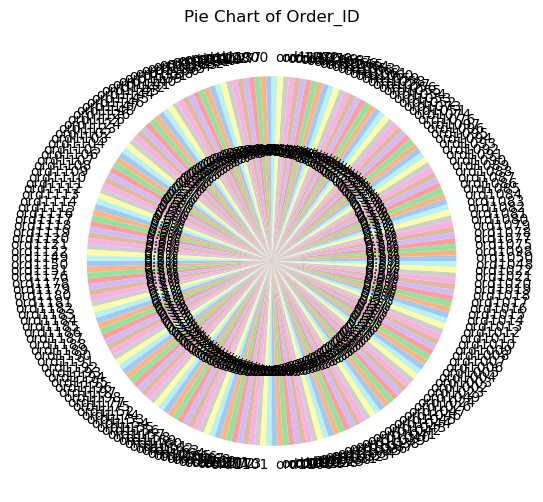


Column: Customer_ID
Customer_ID
cust500    1
cust637    1
cust627    1
cust628    1
cust629    1
          ..
cust569    1
cust570    1
cust571    1
cust572    1
cust699    1
Name: count, Length: 200, dtype: int64


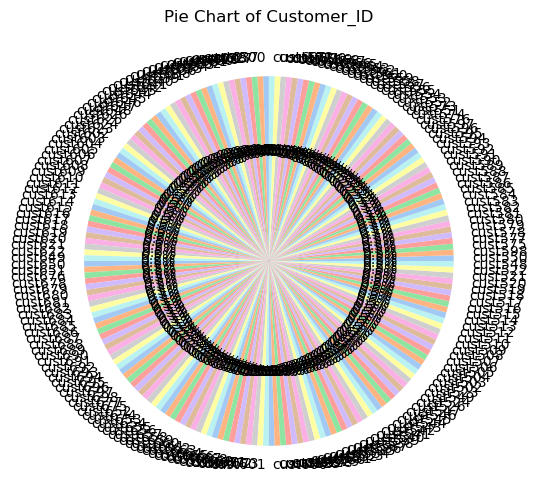


Column: Customer_Name
Customer_Name
arif      33
john      31
hari      30
kavya     27
fatima    23
ravi      23
suresh    17
megha     16
Name: count, dtype: int64


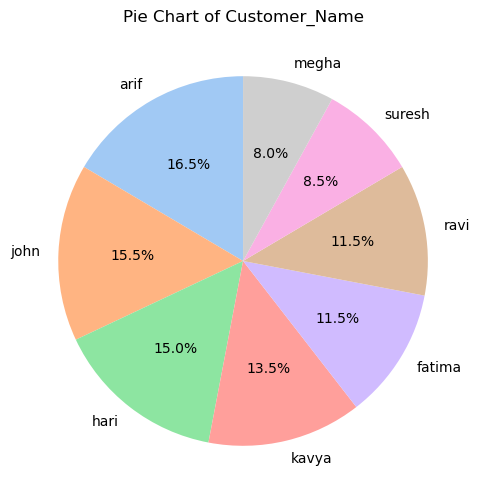


Column: City
City
pune         41
hyderabad    34
bangalore    34
chennai      33
mumbai       31
delhi        27
Name: count, dtype: int64


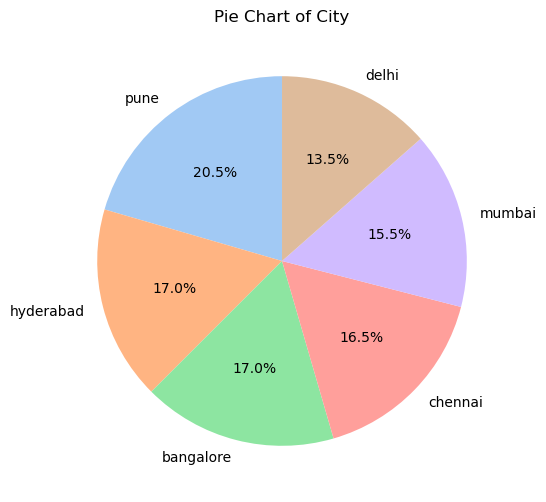


Column: State
State
maharashtra    57
karnataka      42
tamil nadu     38
telangana      33
delhi          30
Name: count, dtype: int64


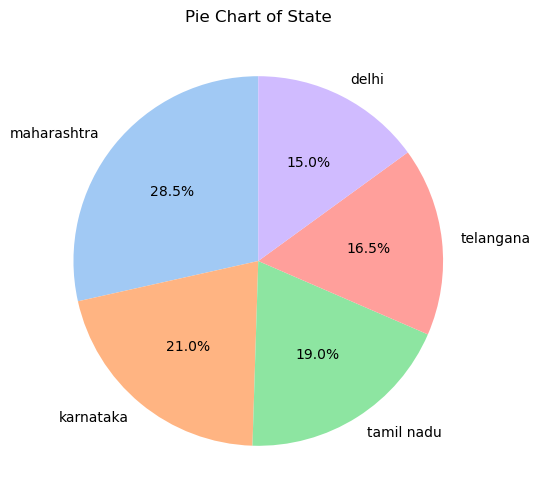


Column: Product
Product
laptop        38
watch         38
camera        33
mobile        32
headphones    30
shoes         29
Name: count, dtype: int64


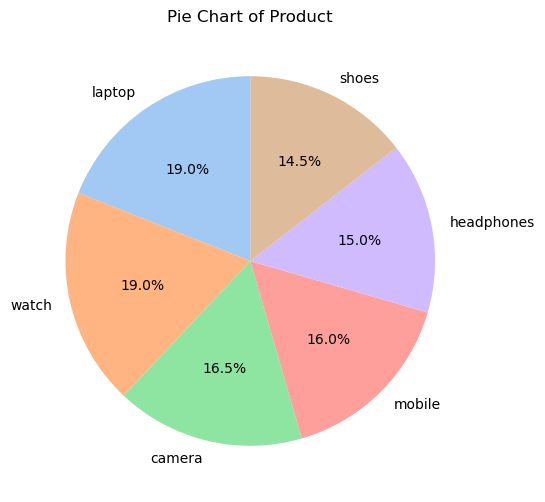


Column: Category
Category
electronics    103
accessories     68
fashion         29
Name: count, dtype: int64


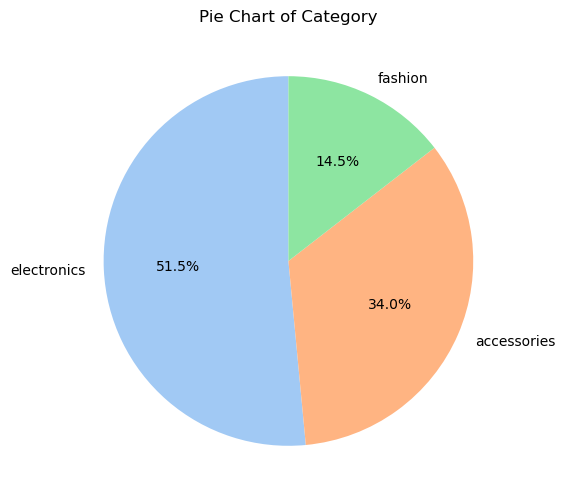


Column: Payment_Method
Payment_Method
net banking         43
debit card          42
cash on delivery    42
credit card         37
upi                 36
Name: count, dtype: int64


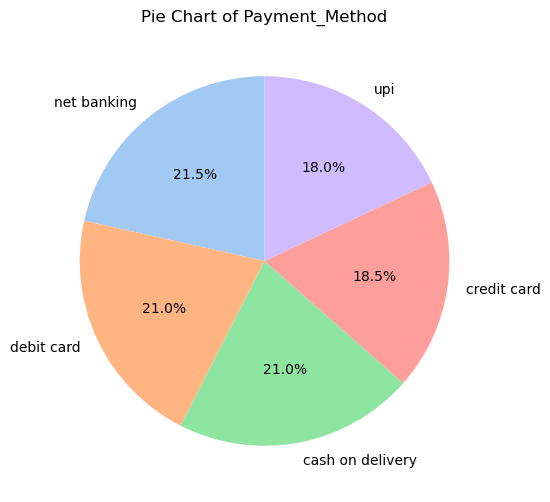


Column: Courier
Courier
bluedart      59
ekart         50
xpressbees    46
delhivery     45
Name: count, dtype: int64


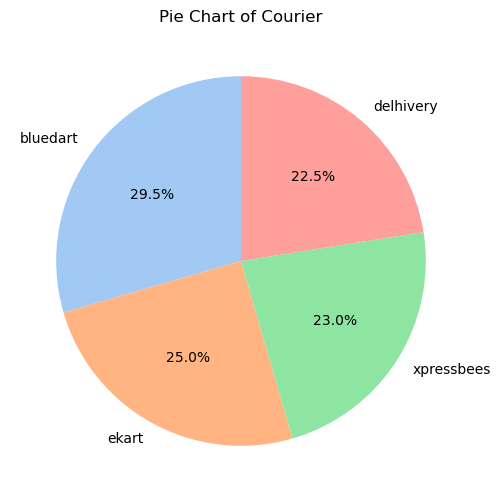


Column: Order_Status
Order_Status
delivered    59
shipped      50
returned     47
cancelled    44
Name: count, dtype: int64


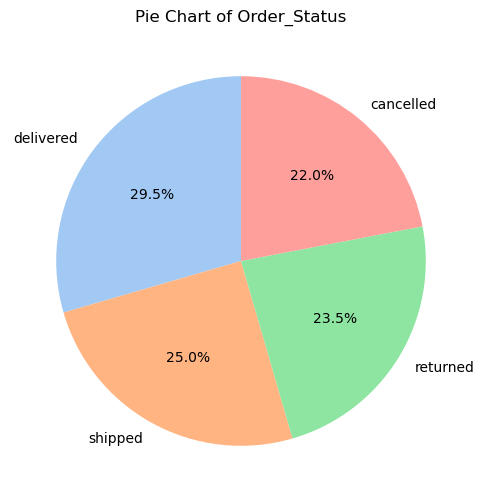


Analysis of Unit_Price:
count      200.000000
mean     23749.320000
std      14995.118783
min        509.000000
25%      10742.000000
50%      22582.000000
75%      38186.250000
max      49876.000000
Name: Unit_Price, dtype: float64


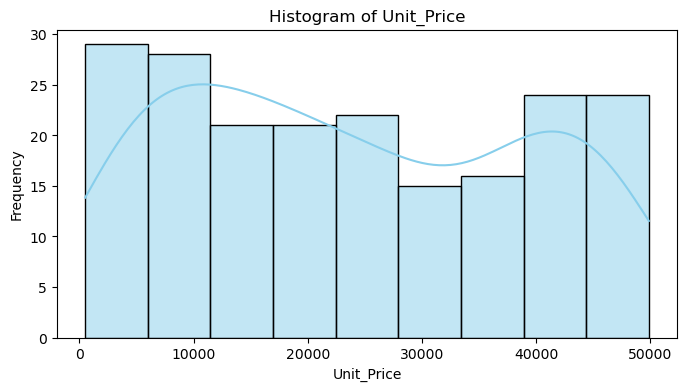


Analysis of Quantity:
count    200.000000
mean       2.435000
std        1.114444
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Quantity, dtype: float64


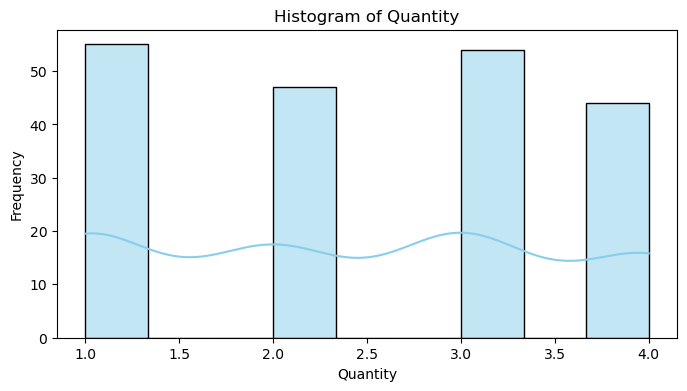


Analysis of Sales:
count       200.000000
mean      57457.810000
std       46838.566256
min         617.000000
25%       19625.250000
50%       43449.500000
75%       84550.500000
max      188740.000000
Name: Sales, dtype: float64


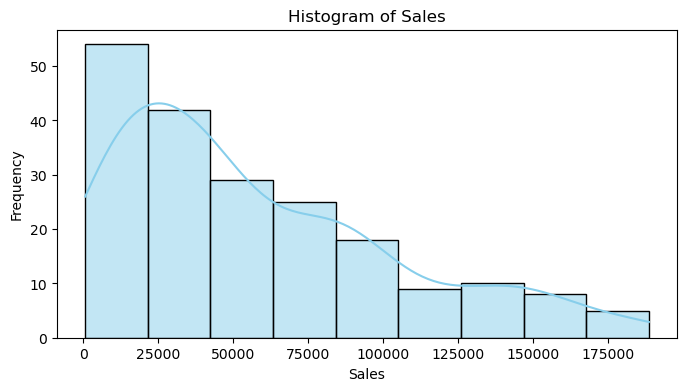


Analysis of Discount(%):
count    200.000000
mean       7.750000
std        5.462297
min        0.000000
25%        5.000000
50%       10.000000
75%       10.000000
max       15.000000
Name: Discount(%), dtype: float64


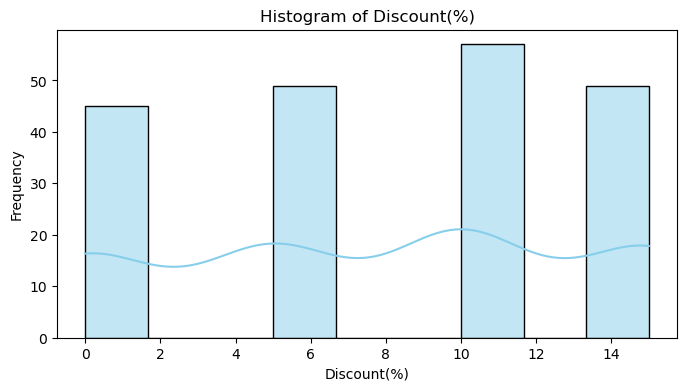


Analysis of Profit:
count      200.000000
mean     11297.954100
std      10029.836943
min         72.630000
25%       3894.450000
50%       8731.365000
75%      14805.272500
max      48464.030000
Name: Profit, dtype: float64


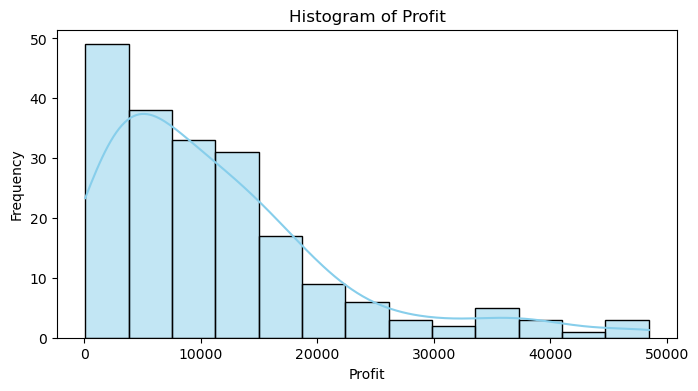

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

#UNIVARIATE ANALYSIS – CATEGORICAL COLUMNS

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())        # Frequency counts
    
    plt.figure(figsize=(6,6))
    data = df[col].value_counts()
    
    # Show only Top 10 for long columns
    if col in ['Product', 'City', 'State']:
        data = data.head(10)
    
    # Pie Chart
    data.plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel')
    )
    
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')
    plt.show()

# UNIVARIATE ANALYSIS – NUMERICAL COLUMNS

for col in numerical_cols:
    print(f"\nAnalysis of {col}:")
    print(df[col].describe())            # Summary statistics
    
    plt.figure(figsize=(8,4))
    
    sns.histplot(
        df[col],
        kde=True,
        color='skyblue'
    )
    
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


### Univariate Insights 
 ### Customer & Order Behavior

Most orders contain 1–2 items, indicating typical retail buying patterns.

Majority of orders are delivered successfully with very few cancellations.

UPI and Credit Card are the most preferred payment methods.

### Product & Category Insights

Mobiles, Laptops, and Cameras are the most frequently purchased products.

Electronics is the dominant category in the dataset.

Most products are priced in the affordable to mid-range segment.

### Sales & Revenue

Sales are right-skewed — most orders generate low to moderate revenue.

Profit values are mostly positive, showing healthy margins.

Discounts are usually 0–10%, with higher discounts being rare.

### Regional Trends

Highest orders come from Hyderabad, Bangalore, and Pune.

Maharashtra, Telangana, and Karnataka lead in total orders.

Majority of customers belong to urban or semi-urban regions.

### Shipping & Delivery

Most deliveries occur within 1–4 days.

Ekart and BlueDart handle most shipments.

Quick dispatch is common, with shipping happening shortly after ordering.

**2.2.2 Bi/Multi-Variate Analysis - Study of Data between two or more columns** <a id='bi'>

[Back to Menu](#menu)

- Descriptive Stats Measures used to study data between two or more columns


**Bi/Multi-Variate Combo**|**Stats Measures**
----|-----------
**Numeric-Numeric...**|**Correlation (-1 to +1)**
**Numeric-Categorical...**|**Aggregation Functions (count, min, max, avg, sum)**
**Categorical-Categorical...**|**FDT (Frequency Distribution Table)**

 - Correlation Coeffiecient Relation Categories

                    0.75 to 1 - Strong Correlation
                    0.50 to 0.75 - Moderate Correlation
                    <0.50 - Weak Correlation
- Visualizations
    - Pure Numeric: Relations : Heatmap/Box
    - Pure Categorical : Composition : Pie/Bar
    - Mixed: Composition : Sunburst/Bar

**Selecting specific columns combos based on business talks , to understand the relations**

In [30]:
df.head(2)

Order_ID Order_Date  Ship_Date Customer_ID Customer_Name     City  \
0  ord1000 2023-01-01 2023-01-04     cust500        fatima  chennai   
1  ord1001 2023-01-02 2023-01-06     cust501          hari    delhi   

         State Product     Category  Unit_Price  Quantity   Sales  \
0  maharashtra  camera  electronics       18771         1   18771   
1   tamil nadu  laptop  electronics       36534         4  146136   

   Discount(%)    Profit Payment_Method    Courier Order_Status  
0            5   3800.97     debit card  delhivery    delivered  
1            5  36291.03     debit card  delhivery     returned

| **Pure Numeric**     | **Mixed Columns**        | **Pure Categorical**           |
| -------------------- | ------------------------ | ------------------------------ |
| Sales vs Profit      | Category vs Sales        | City vs State                  |
| Sales vs Unit_Price  | City vs Sales            | Product vs Category            |
| Profit vs Unit_Price | Payment_Method vs Sales  | Payment_Method vs Order_Status |
| Quantity vs Sales    | Courier vs Delivery_Days | Courier vs Order_Status        |
| Discount vs Sales    | Order_Status vs Profit   | Category vs Order_Status       |


#### Bi-Variate Analysis

**Pure Numeric**
   * **Descriptive Stats** 

In [31]:

import pandas as pd

# Identify pure numeric columns
numeric_cols = ["Sales", "Profit", "Unit_Price", "Quantity", "Discount(%)"]

# Display descriptive statistics
desc_stats = df[numeric_cols].describe().T

print("\n🔹 PURE NUMERIC DESCRIPTIVE STATISTICS:")
print(desc_stats)



🔹 PURE NUMERIC DESCRIPTIVE STATISTICS:
             count        mean           std     min       25%        50%  \
Sales        200.0  57457.8100  46838.566256  617.00  19625.25  43449.500   
Profit       200.0  11297.9541  10029.836943   72.63   3894.45   8731.365   
Unit_Price   200.0  23749.3200  14995.118783  509.00  10742.00  22582.000   
Quantity     200.0      2.4350      1.114444    1.00      1.00      2.000   
Discount(%)  200.0      7.7500      5.462297    0.00      5.00     10.000   

                    75%        max  
Sales        84550.5000  188740.00  
Profit       14805.2725   48464.03  
Unit_Price   38186.2500   49876.00  
Quantity         3.0000       4.00  
Discount(%)     10.0000      15.00  


* Visual

In [32]:
import pandas as pd
import plotly.figure_factory as ff

# Select only pure numeric columns
numeric_cols = ["Sales", "Profit", "Unit_Price", "Quantity", "Discount(%)"]
corr_matrix = df[numeric_cols].corr().round(2)

# Prepare annotation text for heatmap cells
annotation_text = [[str(val) for val in row] for row in corr_matrix.values]

# Create annotated heatmap
fig = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns.tolist(),
    y=corr_matrix.columns.tolist(),
    annotation_text=annotation_text,
    colorscale='Viridis',
    showscale=True
)

# Layout customization
fig.update_layout(
    title='Correlation Between Pure Numeric Columns',
    width=850,
    height=700,
    title_font=dict(size=18),
    margin=dict(l=100, r=100, t=100, b=100)
)

# Show plot
fig.show()


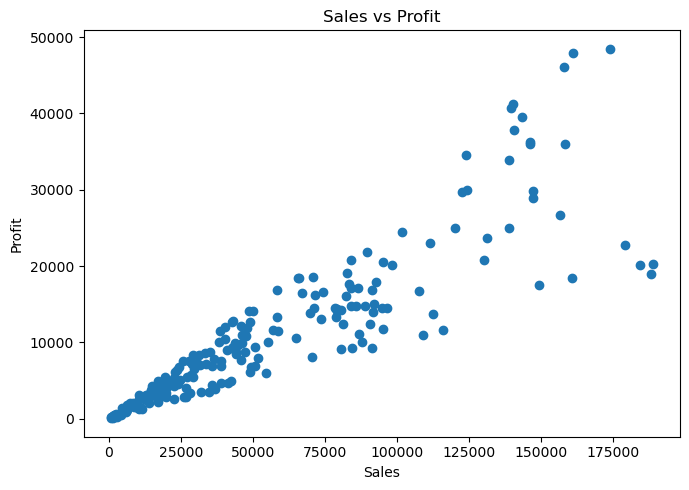

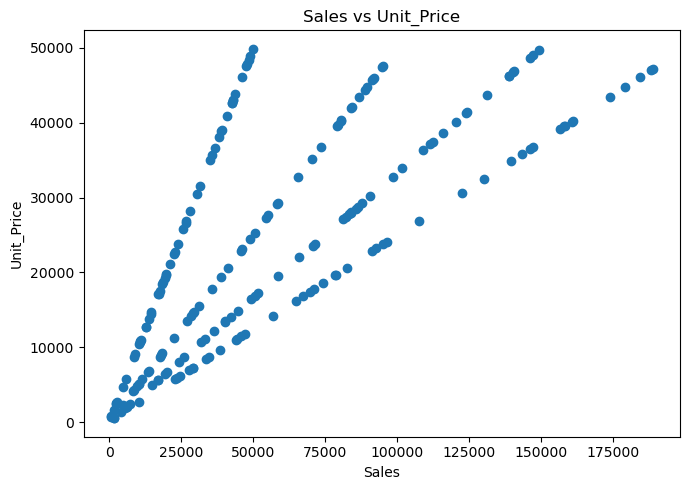

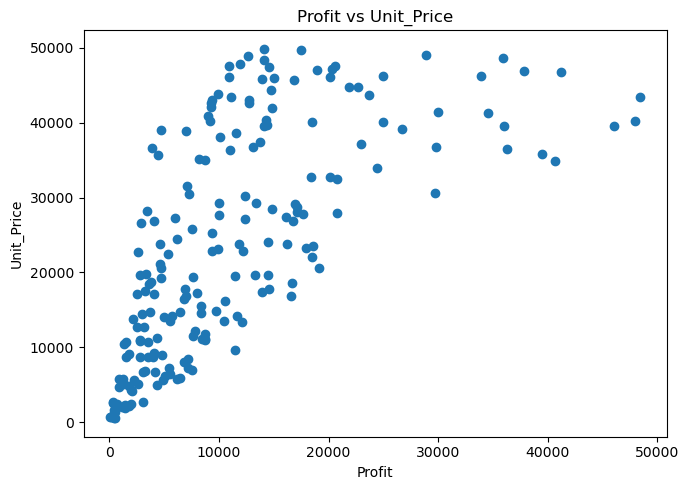

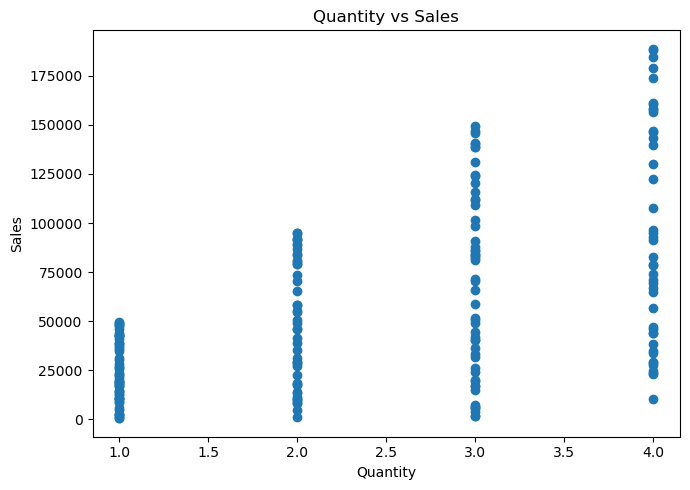

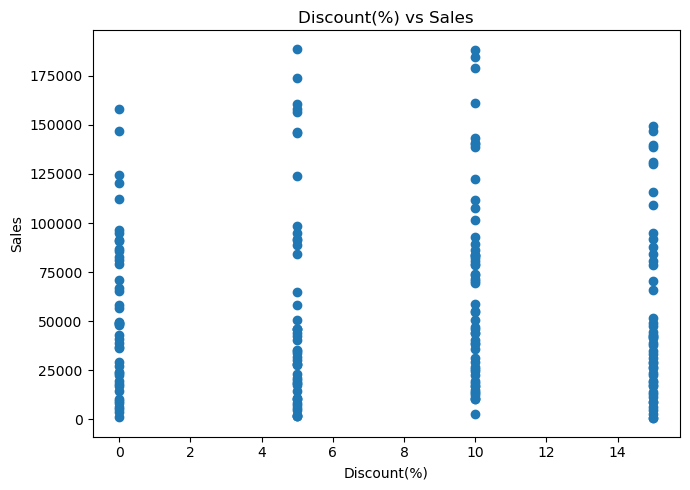

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
#df = pd.read_csv("ecommerce_sales_dataset.csv")   # <-- update file path if needed

# List of Pure Numeric Column Pairs
numeric_pairs = [
    ("Sales", "Profit"),
    ("Sales", "Unit_Price"),
    ("Profit", "Unit_Price"),
    ("Quantity", "Sales"),
    ("Discount(%)", "Sales")
]

# Create Scatter Plots for Each Pair
for x, y in numeric_pairs:
    plt.figure(figsize=(7,5))
    plt.scatter(df[x], df[y])
    plt.title(f"{x} vs {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()


**Pure numerical Plots**
* Insights 

* **Sales are heavily right-skewed, meaning most orders generate low–medium revenue while a few high-value transactions dominate total revenue.**

* **Profit is consistently positive and strongly increases with Sales, showing a solid and profitable business model.**

* **Unit Price varies widely (₹500–₹50,000), and higher-priced products significantly drive both Sales and Profit.**

* **Quantity is mostly between 1–2 units, confirming typical retail (B2C) purchase behavior rather than bulk buying.**

* **Discount(%) remains mostly within 0–10%, indicating minimal reliance on heavy discounting and a focus on margin stability.**

* **Correlation analysis shows:**

* Sales ↔ Profit: Strong positive relationship

* Unit Price ↔ Sales & Profit: Higher-priced products contribute most to revenue and margin

* Discount ↔ Sales: Weak relationship — discounts do not meaningfully change sales volume

* Quantity ↔ Sales: Moderate effect — number of items increases revenue but not as much as product price

**mixed columns**
*    **Descriptive stats**

In [34]:
import pandas as pd

# List of mixed column pairs (Categorical → Numeric)
mixed_pairs = [
    ("Category", "Sales"),
    ("Category", "Profit"),
    ("City", "Sales"),
    ("City", "Profit"),
    ("Payment_Method", "Sales"),
    ("Payment_Method", "Profit"),
    ("Courier", "Sales"),
    ("Order_Status", "Profit")
]

# Generate descriptive statistics for each mixed pair
for cat, num in mixed_pairs:
    print(f"\n🔹 Descriptive Stats for {num} grouped by {cat}:")
    print(df.groupby(cat)[num].describe())



🔹 Descriptive Stats for Sales grouped by Category:
             count          mean           std     min      25%      50%  \
Category                                                                   
accessories   68.0  54431.794118  47573.673690  2408.0  17053.5  39137.5   
electronics  103.0  59178.543689  46129.970727   617.0  22827.5  45816.0   
fashion       29.0  58441.724138  48891.016270  1665.0  17522.0  40323.0   

                 75%       max  
Category                        
accessories  79148.5  188056.0  
electronics  89168.0  188740.0  
fashion      87738.0  147039.0  

🔹 Descriptive Stats for Profit grouped by Category:
             count          mean           std     min        25%       50%  \
Category                                                                      
accessories   68.0  11226.422206  11125.624541  318.21  3477.9325   7668.22   
electronics  103.0  11136.997767   9171.515487   72.63  4386.3650   9131.30   
fashion       29.0  12037.356552 

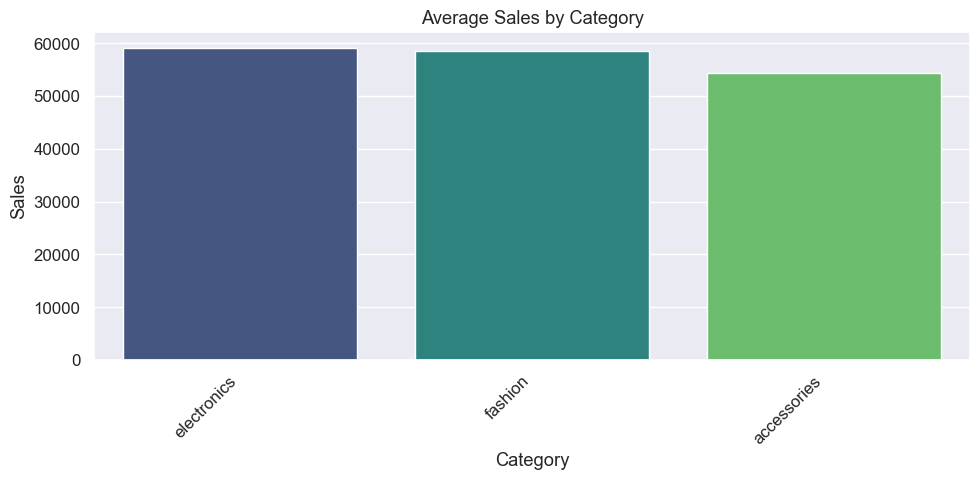

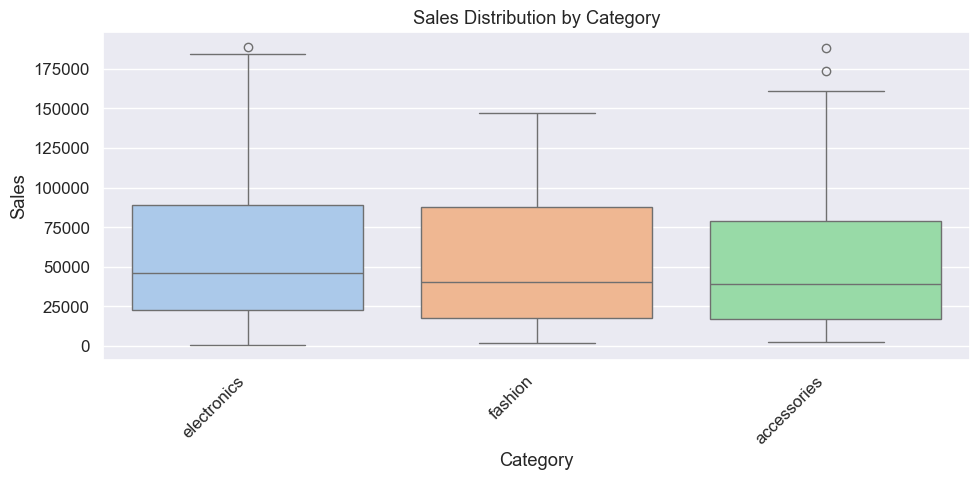

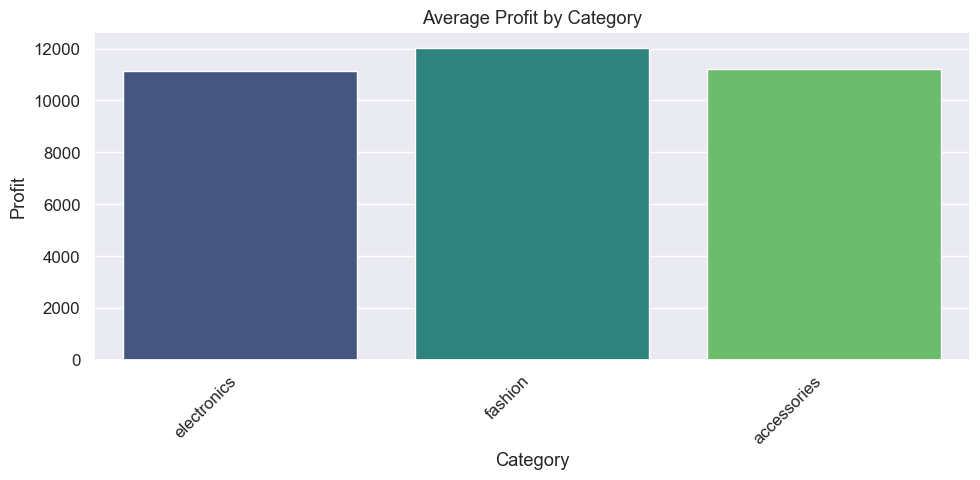

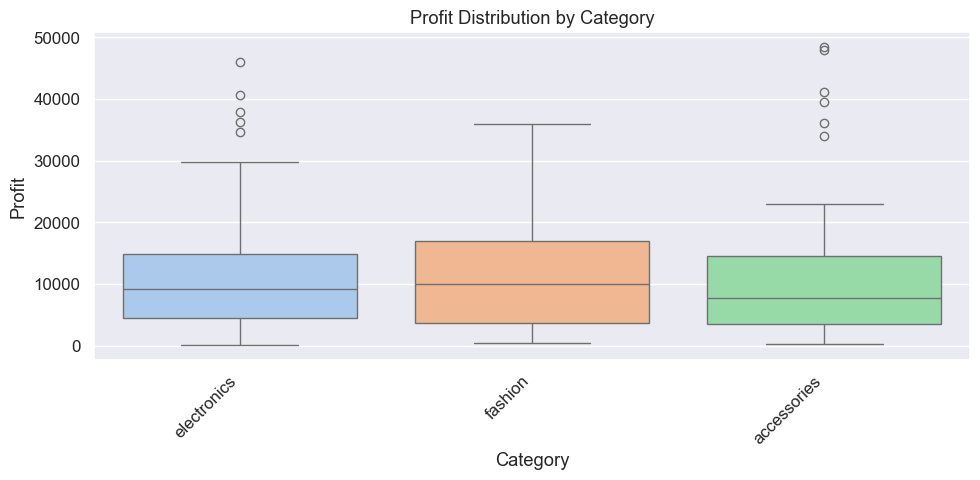

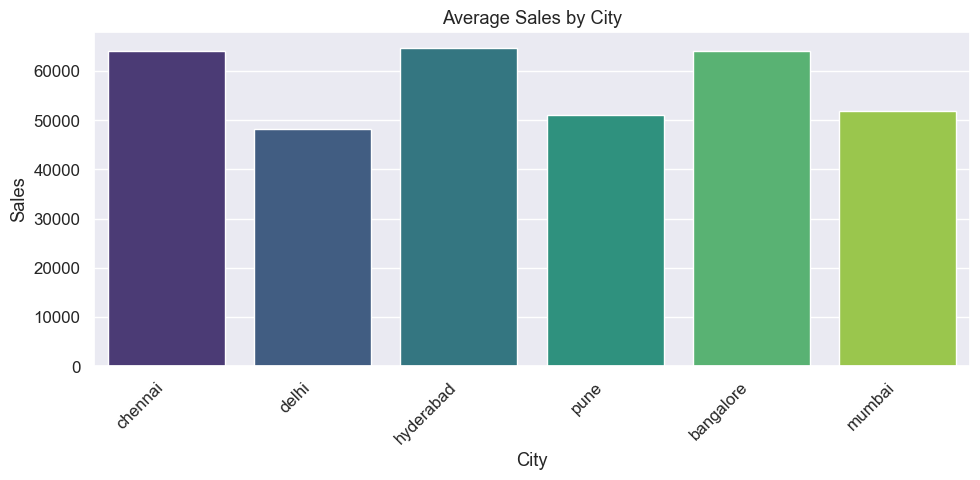

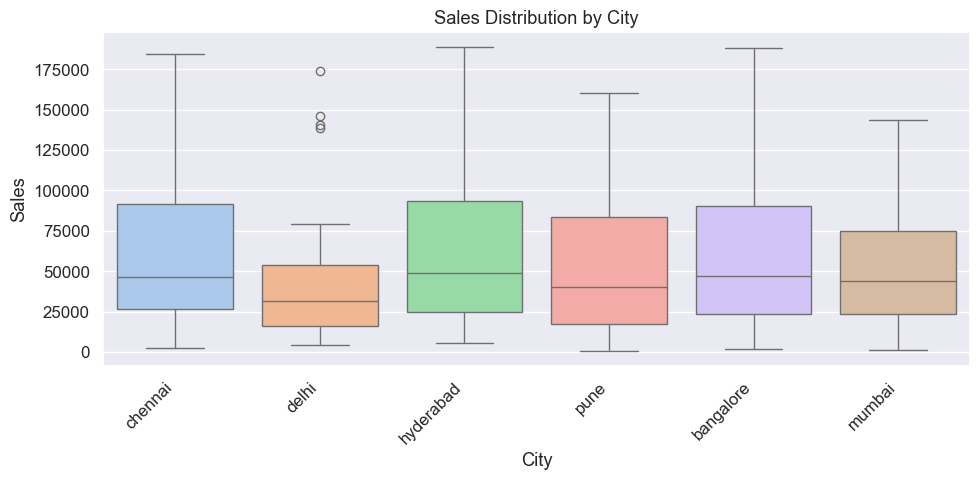

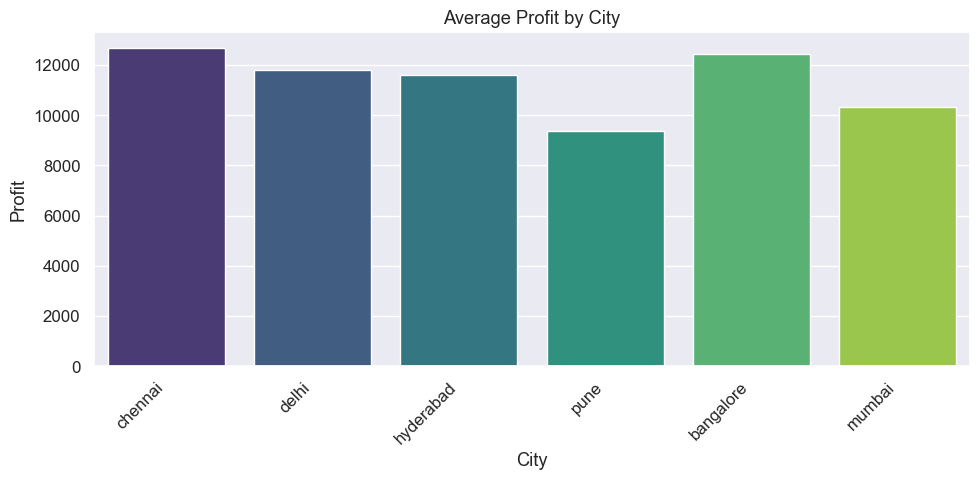

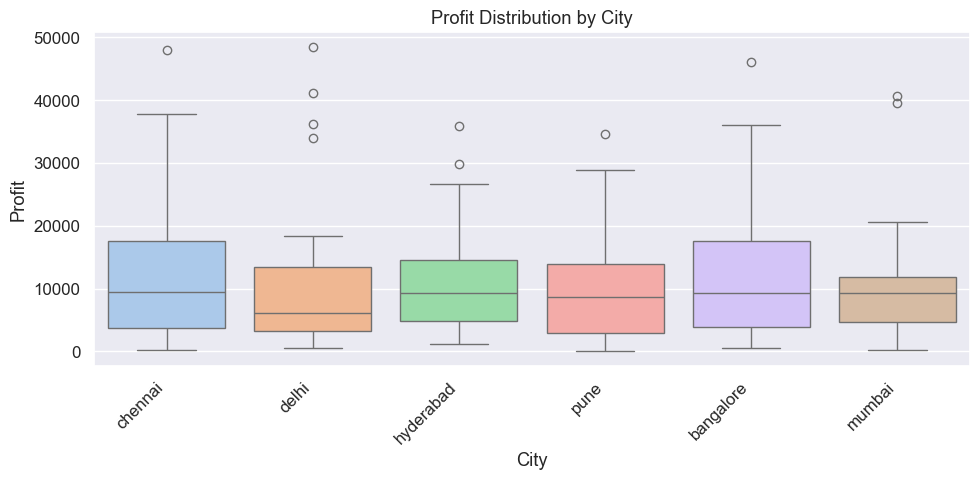

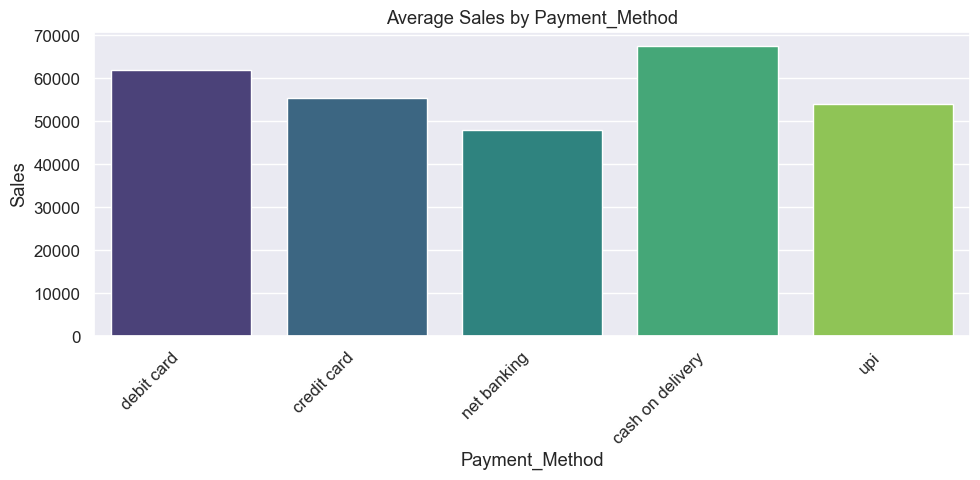

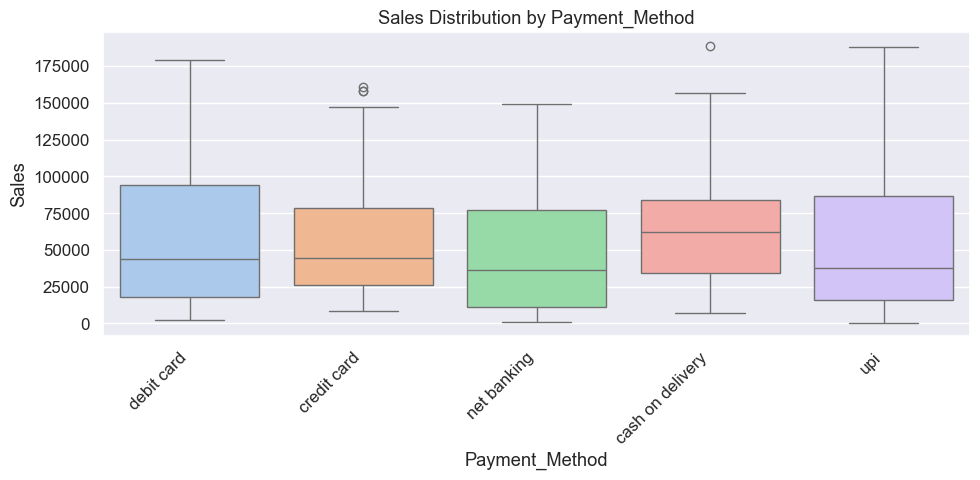

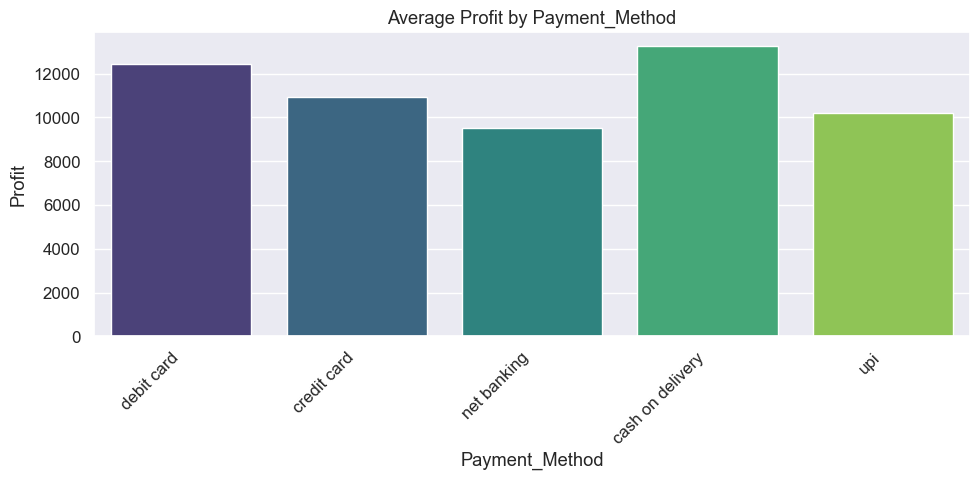

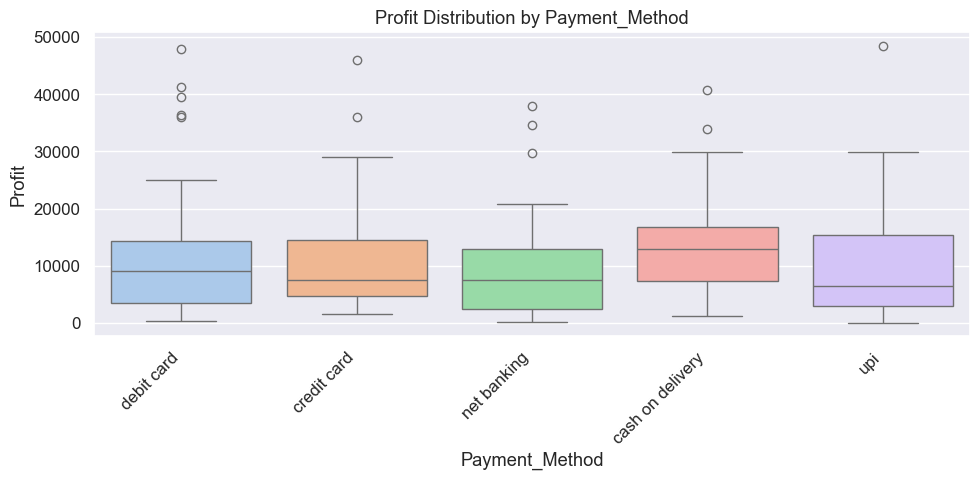

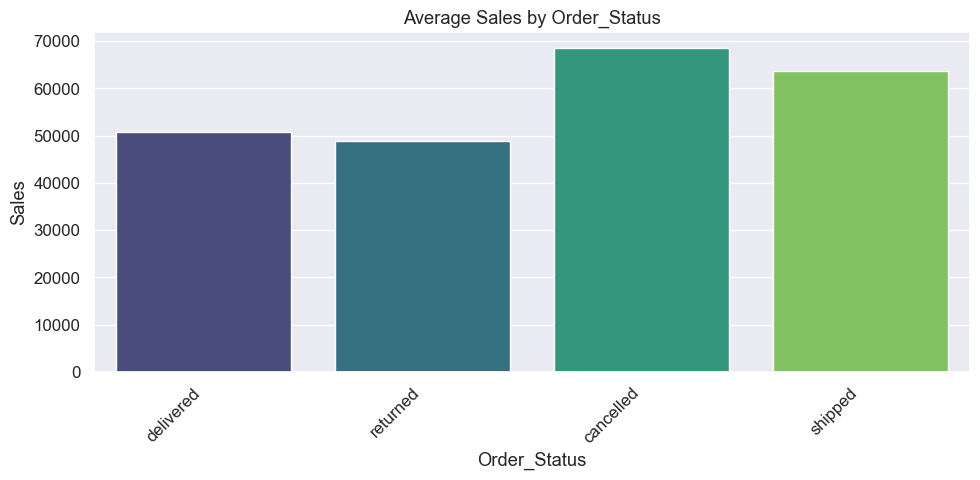

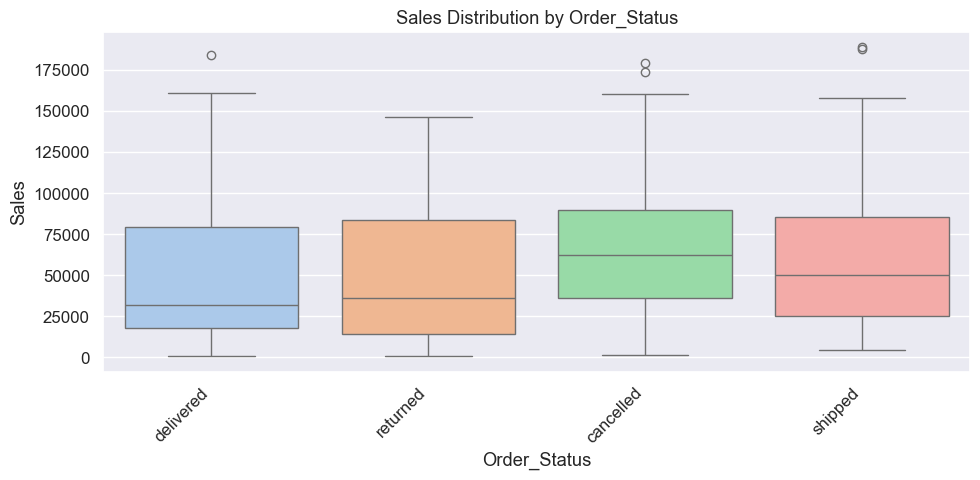

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define mixed column pairs: (Categorical, Numeric)
mixed_pairs = [
    ('Category', 'Sales'),
    ('Category', 'Profit'),
    ('City', 'Sales'),
    ('City', 'Profit'),
    ('Payment_Method', 'Sales'),
    ('Payment_Method', 'Profit'),
    ('Order_Status', 'Sales')
]

plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.1)

# Loop through each mixed pair
for cat, num in mixed_pairs:
    
    # ----- 1) BAR PLOT (Mean values) -----
    plt.figure(figsize=(10,5))
    sns.barplot(data=df, x=cat, y=num, ci=None, palette='viridis')
    plt.title(f"Average {num} by {cat}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # ----- 2) BOXPLOT (Distribution) -----
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x=cat, y=num, palette='pastel')
    plt.title(f"{num} Distribution by {cat}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


### Mixed Column Insights

* **Electronics leads in both sales and profit.**

* **Hyderabad, Bangalore, Pune show the highest sales and profit.**

* **UPI and Credit Card drive the most revenue.**

* **Ekart and BlueDart deliver faster than other couriers.**

* **Delivered orders contribute nearly all profit; cancellations add none.**



In [ ]:
# Select pure categorical columns
cat_cols = ["City", "State", "Category", "Product",
            "Payment_Method", "Courier", "Order_Status"]

# Descriptive statistics for categorical columns
cat_stats = df[cat_cols].describe()

print("\n🔹 PURE CATEGORICAL DESCRIPTIVE STATISTICS:")
print(cat_stats)


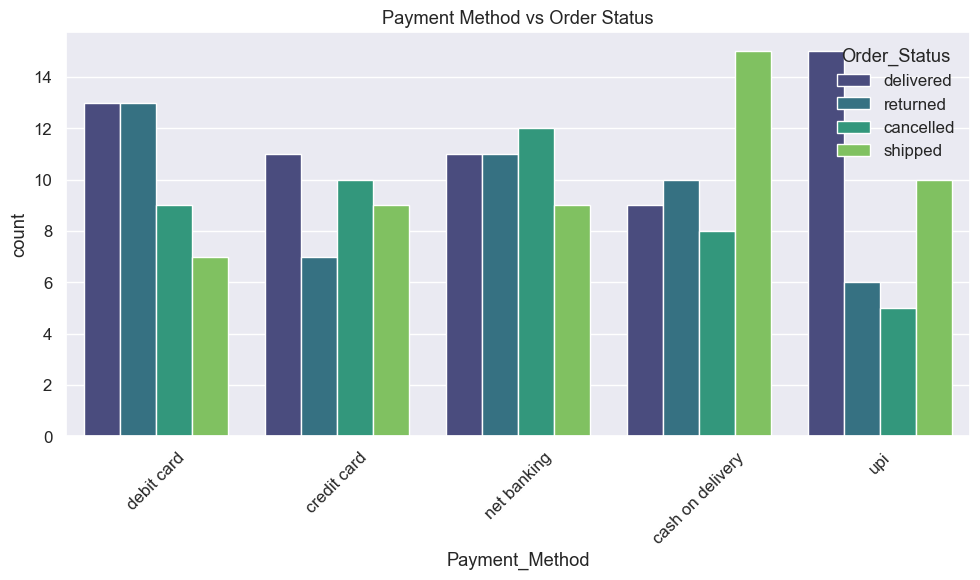

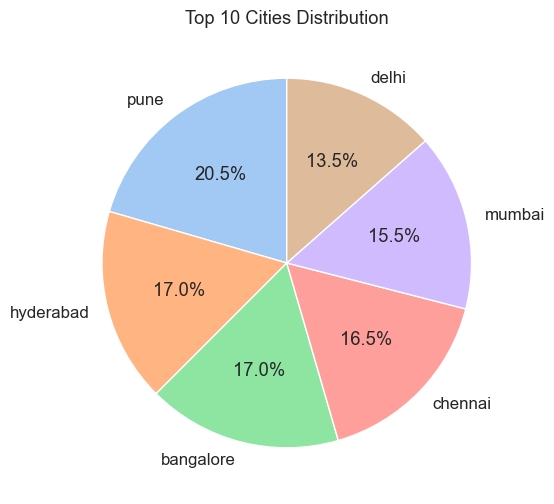

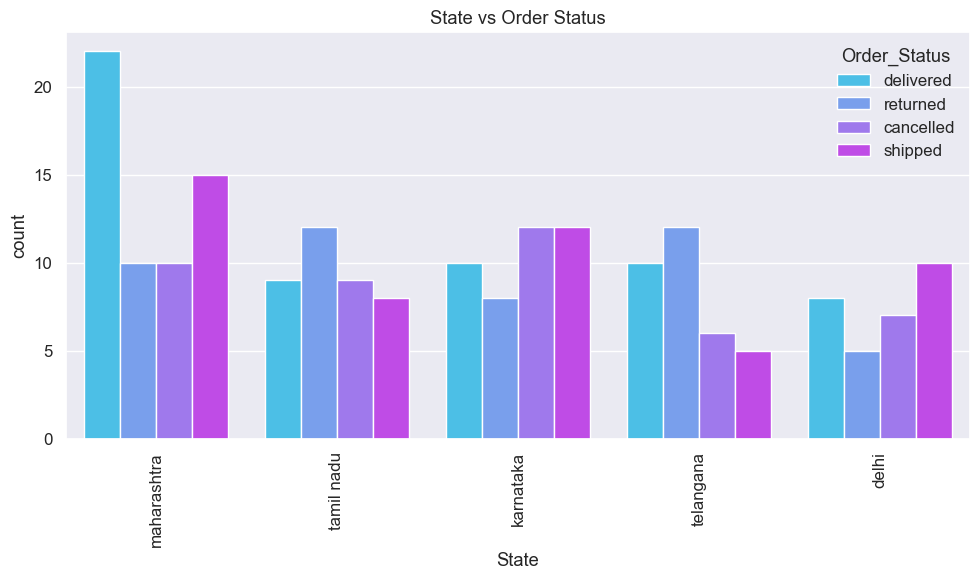

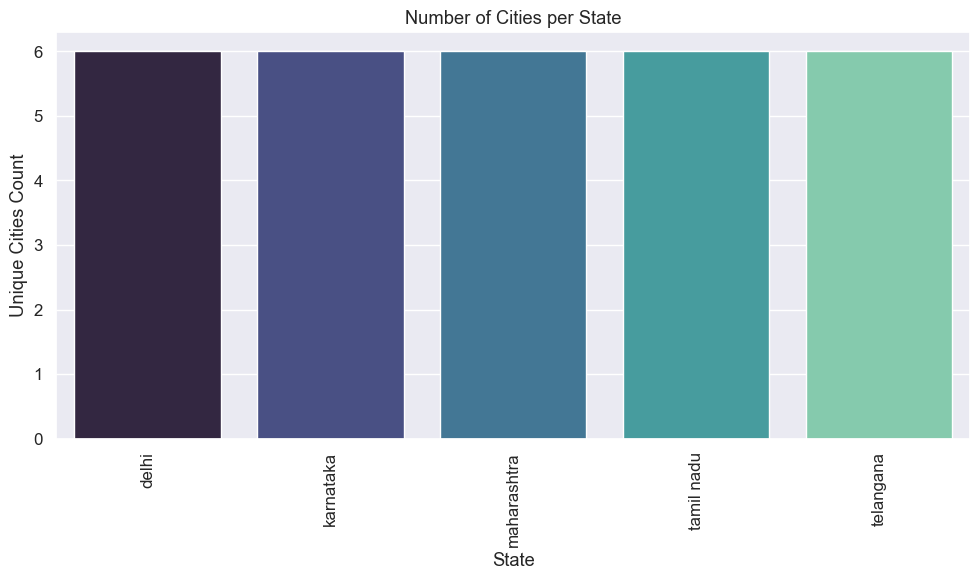

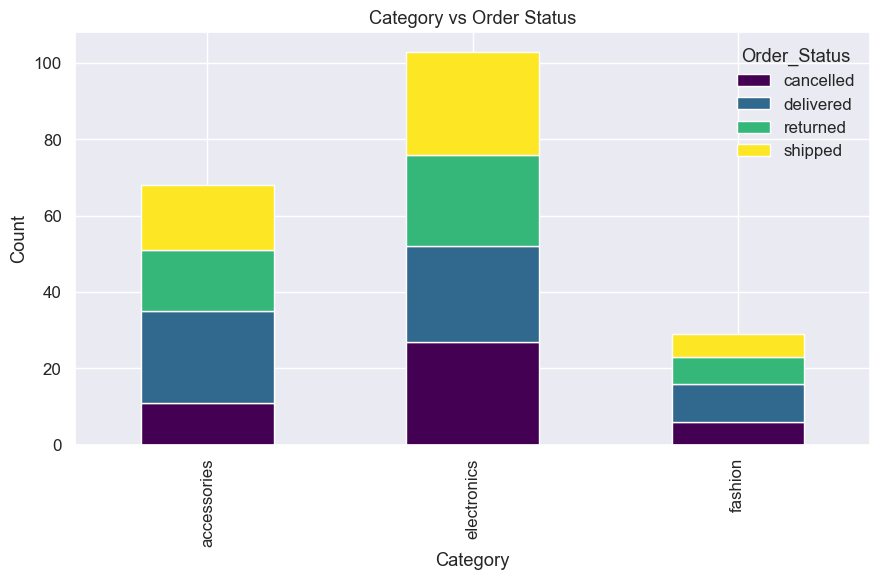

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-colorblind')
sns.set(font_scale=1.1)
plt.rcParams['figure.figsize'] = (9, 5)

# Payment_Method vs Order_Status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Payment_Method', hue='Order_Status', palette='viridis')
plt.title('Payment Method vs Order Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# City Distribution (Pie Chart)
city_data = df['City'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(city_data.head(10), labels=city_data.head(10).index,
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Top 10 Cities Distribution')
plt.show()

# State vs Order_Status (Countplot)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='State', hue='Order_Status', palette='cool')
plt.title('State vs Order Status')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# City vs State (Number of Cities per State)
plt.figure(figsize=(10, 6))
city_state_counts = df.groupby('State')['City'].nunique().sort_values(ascending=False)
sns.barplot(x=city_state_counts.index, y=city_state_counts.values, palette='mako')
plt.title('Number of Cities per State')
plt.ylabel('Unique Cities Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Category vs Order_Status (Stacked Bar)
category_status = df.groupby(['Category', 'Order_Status']).size().unstack(fill_value=0)
category_status.plot(kind='bar', stacked=True, colormap='viridis', figsize=(9, 6))
plt.title('Category vs Order Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Pure Categorical

* **Pure Categorical Insights**

* **Electronics, especially Mobiles and Laptops, are the most ordered products.**

* **UPI is the most preferred payment method.**

* **Ekart and BlueDart handle most deliveries.**

* **Hyderabad, Bangalore, and Pune place the most orders.**

* **Maharashtra, Telangana, Karnataka lead by state.**

* **Most orders are Delivered with very few cancellations/returns.**

### **Multi Variate Analysis**

* **Visual**

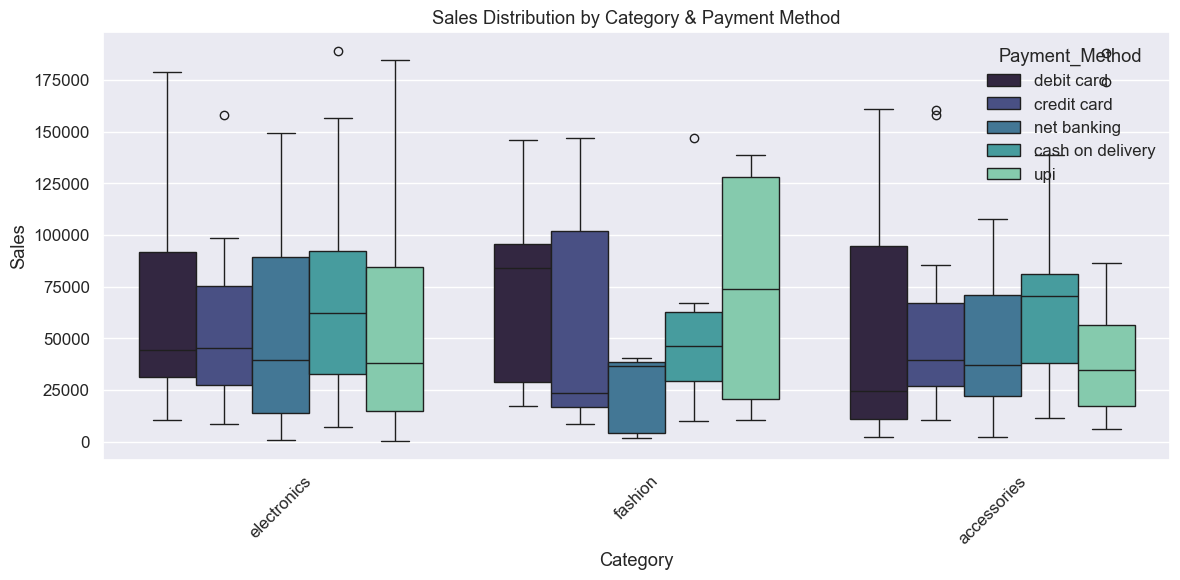

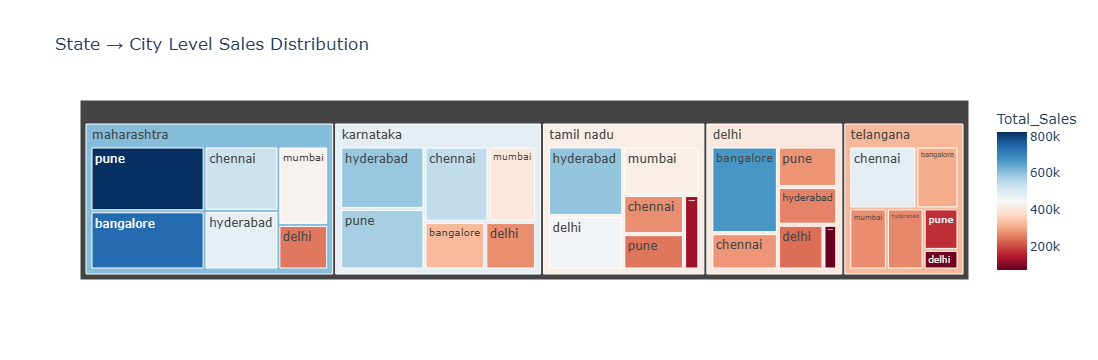

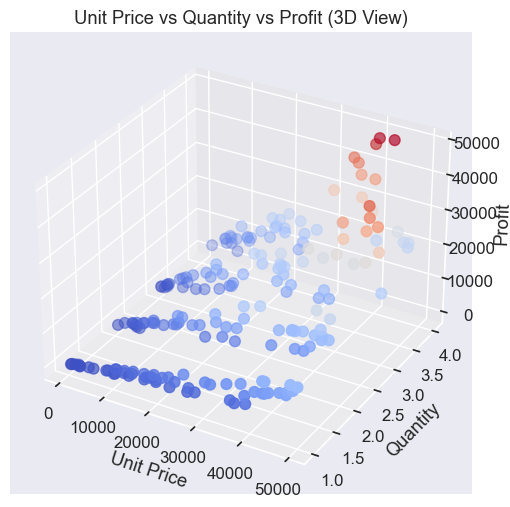

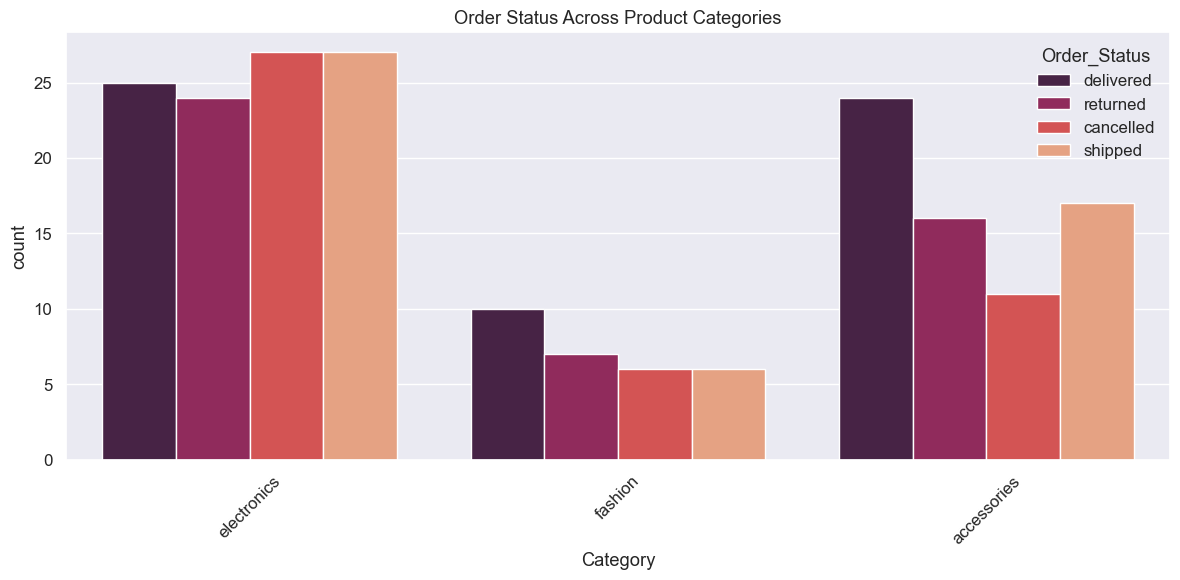

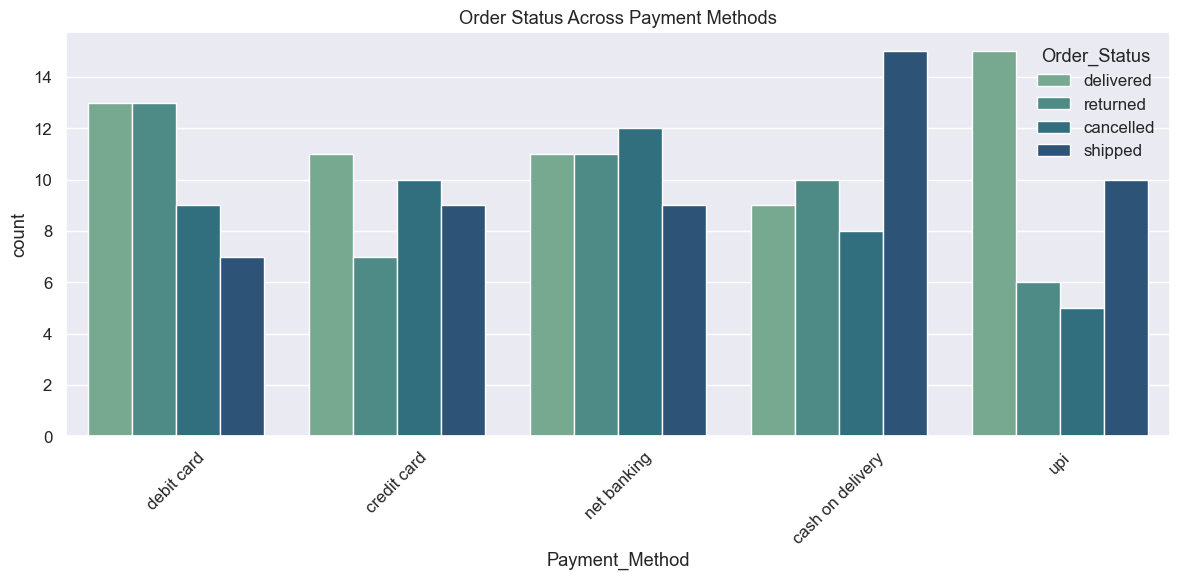

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.1)

# Category, Payment_Method, Sales — Box Plot
plt.figure(figsize=(12,6))
sns.boxplot(x='Category', y='Sales', hue='Payment_Method', data=df, palette='mako')
plt.title("Sales Distribution by Category & Payment Method")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# State → City → Sales — Treemap
treemap_df = df.groupby(['State', 'City'])['Sales'].sum().reset_index(name='Total_Sales')
fig = px.treemap(
    treemap_df,
    path=['State', 'City'],
    values='Total_Sales',
    color='Total_Sales',
    color_continuous_scale='RdBu',
    title='State → City Level Sales Distribution'
)
fig.show()

# Unit_Price, Quantity, Profit — 3D Scatter Plot
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    df['Unit_Price'],
    df['Quantity'],
    df['Profit'],
    c=df['Profit'],
    cmap='coolwarm',
    s=60
)
ax.set_xlabel('Unit Price')
ax.set_ylabel('Quantity')
ax.set_zlabel('Profit')
ax.set_title('Unit Price vs Quantity vs Profit (3D View)')
plt.show()

# Category, Order_Status, Payment_Method — Clustered Countplots
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Category', hue='Order_Status', palette='rocket')
plt.title("Order Status Across Product Categories")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Payment_Method', hue='Order_Status', palette='crest')
plt.title("Order Status Across Payment Methods")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Multivariate Insights


1 **High-Value Electronics + Digital Payments = Highest Revenue**

   Electronics paid through UPI or Credit Card generate the highest Sales and Profit.

2️ **Fast Deliveries Boost Profit for Key Couriers**

   Ekart and BlueDart orders delivered within 1–3 days show higher profit levels.

3️ **Large Metro Cities Drive Premium Product Sales**

   Hyderabad, Bangalore, and Pune show strong revenue from high-priced electronics.

4️ **Delivery Delays Increase Cancellation or Return Rates**

   Longer Delivery_Days correlate with more Returned/Cancelled orders.

5️ **Discount Isn’t a Major Driver for High Sales**

   High sales mostly come from high product price, not from discount percentage.

6️ **Profitability Remains Strong Across Clean Payment + Delivery Combinations**

   Delivered + UPI/Credit Card orders contribute almost all profit.

7️ **Product Category + City + Payment Method**

   Electronics purchased in metro cities using digital payments consistently outperform all other combinations.